# Linear Regression of Baseball Data based on the Movie "Moneyball"

In the movie "Moneyball", Dr. Paul DePodesta, the Oakland A's team statistician claim that in order to get to the playoffs, you must win at least 95 games and have at least 135 more runs than your opponents.

He also contends that on-base percentage is very important in affecting runs scored, followed by slugging percentage, and he also contends that batting average is over-valued.  This notebook will attempt to support or disprove his theories.

This notebook is part of the MIT course "The Analytics Edge" where the solution was originally done in R.  In this notebook, we will see if we can verify Dr. DePodesta's claims.

In [1]:
from IPython.display import Image  # Embed binary of images so that image file does not need to be provided

### Summary of Oakland A's Dr. DePodesta's goal for the team:

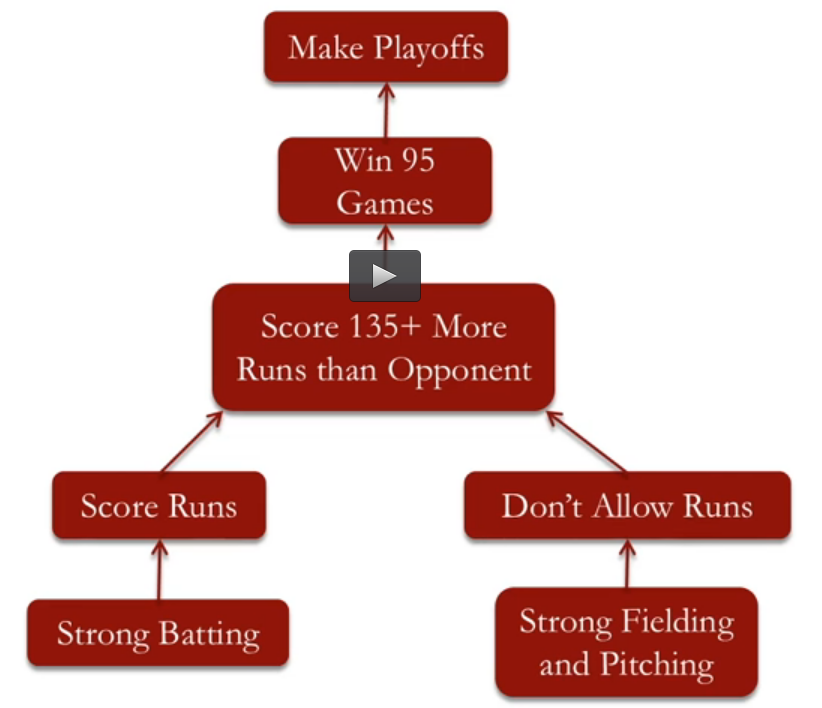

In [2]:
Image("../images/baseball_team_goal.png")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf  # Using formula API

In [4]:
baseball = pd.read_csv('../data/baseball.csv')

In [5]:
baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


Data metadata:

- Team: team's 3-letter acronym
- League: NL = National League, AL=American League
- Year: season year
- RS: runs scored
- RA: runs allowed
- W: number of games won
- OBP: on-base percentage (percentage of time player ends up on base, including walks)
- SLG: slugging percentage (how far player gets around the baseson his turn, measuring power)
- BA: batting average
- Playoffs: whether or not the team reached the playoffs (0=No, 1=Yes)
- RankSeason: Team rank during the regular season
- RankPlayoffs: Team rank during the playoffs
- G: Number of games played in regular season
- OOBP: opponent's on-base percentage
- OSLG: opponent's slugging percentage

#### In the movie, the data set that Dr. DePodesta was working with was only for the years 1996 through 2001

In [6]:
moneyball = baseball.query("Year > 1995 and Year < 2002")

In [7]:
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393


### Dr. DePodesta claimed that the team must have at least 95 games to be able to reach the playoffs.  Can we confirm?

We will use seaborn's stripplot plot to plot the number of wins for each team and the color of the plots will denote if they reached the playoffs (1) or not (0).  We also only want years greater than 1995 to match the output in the video.

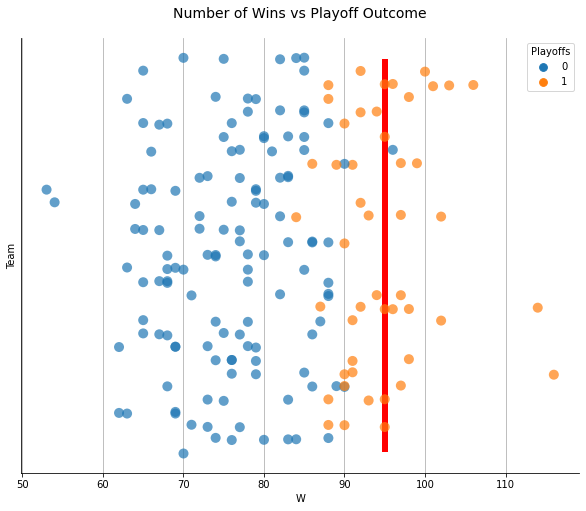

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
(sns.stripplot(x="W",
             y="Team",
             hue="Playoffs",
             data=moneyball,
             alpha=0.7,
             s=10,
             ax=ax
            )
).set_yticks([]);  # Remove the y-ticks and labels to match what was shown in video course
plt.title("Number of Wins vs Playoff Outcome", pad=20, fontsize=14)
plt.grid(True)
sns.despine()
plt.vlines(x=95, ymin=0, ymax=30, colors='red', linewidth=6);

### Answer: approximately 95 wins

### Dr. DePodesta also claimed that the team must score 134 more runs than their opponents.  Can we confirm?

We need to create a new column called "RD" to represent run difference or runs scored (RS) minus runs allowed (RA): 

In [9]:
moneyball = moneyball.assign(RD=moneyball['RS'] - moneyball['RA'])

In [10]:
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


#### Let's create a scatter plot of wins (W) versus runs difference (RD):

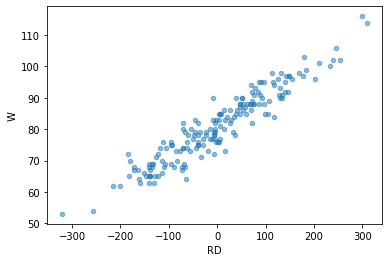

In [11]:
moneyball.plot.scatter(x='RD', y='W', alpha=0.5);

From the chart above, we see there is a positive correlation between wins and runs difference.

#### Let's create a linear regression model where the dependent variable is the wins column (W) and independent variable is the runs difference (RD):

In [12]:
model = smf.ols('W ~ RD', data=moneyball.query("Year > 1995")).fit()

In [13]:
predictions = model.predict()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1528.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           4.40e-88
Time:                        21:43:17   Log-Likelihood:                -477.23
No. Observations:                 176   AIC:                             958.5
Df Residuals:                     174   BIC:                             964.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.9375      0.276    293.121      0.000      80.393      81.482
RD             0.0965      0.002     39.087      0.000       0.092       0.101
==============================================================================
Omnibus:                        0.715   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.600
Skew:                          -0.143   Prob(JB):                        0.741
Kurtosis:                       3.007   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Let's plot the actual data with the model or prediction line:

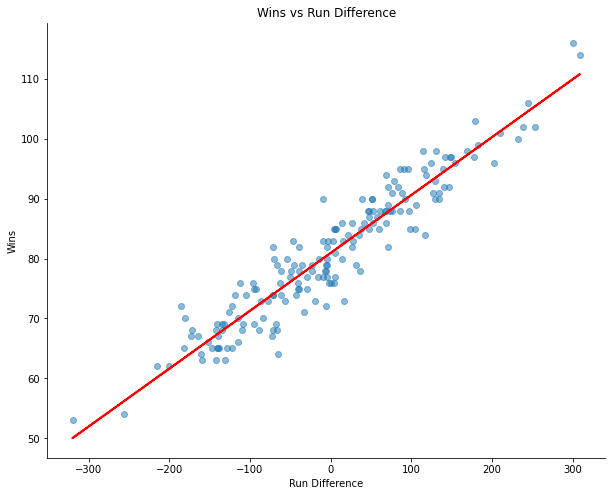

In [15]:
plt.figure(figsize=(10, 8))
plt.plot(moneyball['RD'], moneyball['W'], 'o', alpha=0.5)
plt.plot(moneyball['RD'], predictions, 'r', linewidth=2)
plt.xlabel('Run Difference')
plt.ylabel('Wins')
plt.title('Wins vs Run Difference')
sns.despine()
plt.show()

**Proof:** What is minimum run difference needed to have more than 95 games won?

From our model metrics output above, the y-intercept is 80.8814 and the slope is 0.1058.

$y = mx + b$<br><br>
$W = 0.0965(RD) + 80.93.75$<br><br>
$W \geq 95$<br><br>

Now we need to solve for ```RD```:

$0.0965(RD) + 80.9375 \geq 95$<br><br>
$RD \geq \frac{95 - 80.9375}{0.0965} = 145.7$<br><br>
$RD \geq 145.7$

In [17]:
(95-80.9375)/0.0965

145.72538860103626

**Answer:** You need to have a run difference of at least 146

### How to Predict Runs

To predict the number of runs, we need to ask ourselves what factors affects runs?  Dr. DePodesta claimed that the following are important factors:

- On-base percentage
- Slugging percentage

He also claimed that batting average was over-valued.

**Proof:**
- On-Base Percentage is most important
- Slugging Percentage is next important
- Batting Average is overvalued

Can we use linear regression to verify which baseball stats are important for predicting runs?

#### Let's view our data again

In [18]:
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


So we want to create a linear regression where the dependent variable is runs scored (RS) and the dependent variables are on-base percentage(OBP), slugging percentage (SLG), and batting average (BA):

In [19]:
RunsReg = smf.ols('RS ~ OBP+SLG+BA', data=moneyball.query("Year > 1995")).fit()

In [20]:
RunsReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RS   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     636.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           7.92e-93
Time:                        21:46:30   Log-Likelihood:                -812.64
No. Observations:                 176   AIC:                             1633.
Df Residuals:                     172   BIC:                             1646.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -967.1670     48.112    -20.102      0.000   -1062.134    -872.200
OBP         3515.7627    258.583     13.596      0.000    3005.357    4026.168
SLG         1354.0877    119.875     11.296      0.000    1117.471    1590.704
BA           -14.1154    316.852     -0.045      0.965    -639.535     611.304
==============================================================================
Omnibus:                        1.432   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                1.364
Skew:                           0.214   Prob(JB):                        0.505
Kurtosis:                       2.947   Cond. No.                         229.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hmmm, we have a negative coefficient for batting average?  Which is counter-intuative.  It means that when a team has a higher batting average, it will tend to have lower runs scored.  The cause for this is the existence of multicollinearity.

In [21]:
corr = moneyball.corr()

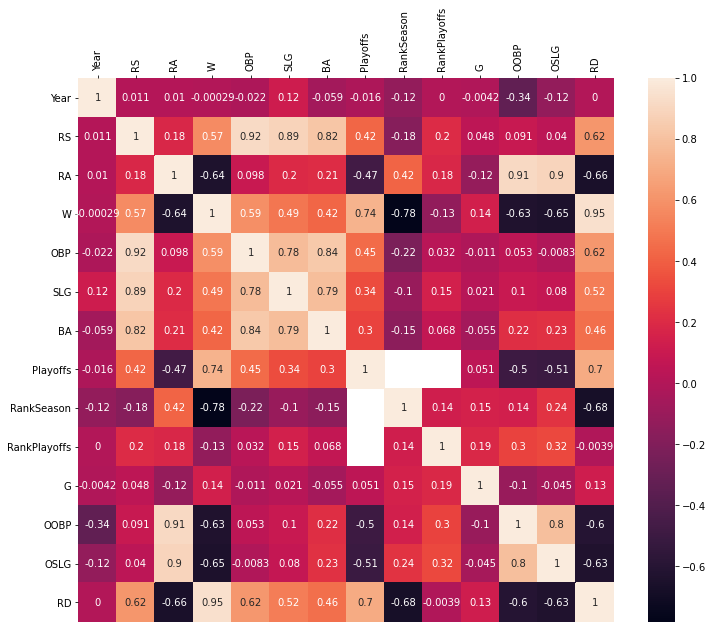

In [22]:
fig, ax = plt.subplots(figsize=(12,10))
ax.xaxis.set_ticks_position('top')
sns.heatmap(corr, annot=True, ax=ax);

We see from the correlation heatmap above that the independent variables OBP, SLG, and BA are very correlated with each other with correlation coefficients of at least 0.8.

Since BA has lesser significance (from the lower t value), we will remove it first and see if there is a major change to the linear regression model's accuracy (R-squared).

In [23]:
RunsRegWithOutBA = smf.ols('RS ~ OBP+SLG', data=moneyball).fit()

In [24]:
RunsRegWithOutBA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RS   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     959.7
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           2.26e-94
Time:                        21:47:16   Log-Likelihood:                -812.64
No. Observations:                 176   AIC:                             1631.
Df Residuals:                     173   BIC:                             1641.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -967.8313     45.611    -21.219      0.000   -1057.857    -877.805
OBP         3509.1824    211.631     16.582      0.000    3091.472    3926.893
SLG         1352.0076    110.089     12.281      0.000    1134.716    1569.299
==============================================================================
Omnibus:                        1.420   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.351
Skew:                           0.213   Prob(JB):                        0.509
Kurtosis:                       2.949   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With BA removed, R2 remain the same.

#### For added thoroughness, let's also remove slugging percentage (SLG) and then evaluate the model's performance

In [25]:
RunsRegWithoutSLG_BA = smf.ols('RS ~ OBP', data=moneyball.query("Year > 1995")).fit()

In [26]:
RunsRegWithoutSLG_BA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RS   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     950.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           2.08e-72
Time:                        21:48:00   Log-Likelihood:                -867.81
No. Observations:                 176   AIC:                             1740.
Df Residuals:                     174   BIC:                             1746.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1079.3269     60.978    -17.700      0.000   -1199.678    -958.975
OBP         5542.6830    179.798     30.827      0.000    5187.817    5897.549
==============================================================================
Omnibus:                        0.290   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.082
Skew:                          -0.011   Prob(JB):                        0.960
Kurtosis:                       3.103   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our model with SLG also removed performed worse with a lower R2 value (0.85)

#### How do we determine if OBP has more impact to the dependent variable than SLG?

We can calculate what are known as "standardized coefficients" if you create a linear regression model from standardized values of our data set, instead of their original values.

One way we can normalize our data set's values to the standard normal is by using scipy's stats.zscore() [method](https://stackoverflow.com/questions/50842397/how-to-get-standardised-beta-coefficients-for-multiple-linear-regression-using) or if you already have limited your dataframe to consist of only numeric columns, we can just subtract the dataframe by the mean, then divide by the standard deviation as in this SO [example](https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame).  The calculations are performed on a column-wise basis, not based on the entire dataframe.

In [ ]:
# standardizing dataframe
# moneyball_z = moneyball.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

In [ ]:
# moneyball_z.head()

#### Normalizing using pandas method:

In [27]:
moneyball_subset = moneyball[['RS','OBP','SLG','BA']]

In [28]:
normalized_df=(moneyball_subset-moneyball_subset.mean())/moneyball_subset.std()

In [29]:
normalized_df.head()

,RS,OBP,SLG,BA
330,-1.262268,-0.836504,-0.814595,-0.597946
331,0.224490,0.151581,0.543828,-0.083751
332,-0.817411,-1.048237,-0.557596,-0.683645
333,-1.309095,-1.401125,-1.732449,-1.712033
334,-0.314020,-0.342462,0.433686,-0.169450


In [30]:
model = smf.ols('RS ~ OBP+SLG+BA', data=normalized_df).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RS   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     636.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           7.92e-93
Time:                        21:49:57   Log-Likelihood:                -29.866
No. Observations:                 176   AIC:                             67.73
Df Residuals:                     172   BIC:                             80.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.176e-15      0.022   2.37e-13      1.000      -0.043       0.043
OBP            0.5832      0.043     13.596      0.000       0.499       0.668
SLG            0.4318      0.038     11.296      0.000       0.356       0.507
BA            -0.0019      0.043     -0.045      0.965      -0.087       0.084
==============================================================================
Omnibus:                        1.432   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                1.364
Skew:                           0.214   Prob(JB):                        0.505
Kurtosis:                       2.947   Cond. No.                         3.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""